# EDA
Now after cleaning the data we will do some exploratory data analysis to understand the data better.

First I'll charge the data and the libraries needed for the analysis.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

merged_file = 'data/properties_bookings.csv'
merged_df = pd.read_csv(merged_file)

Now I'll start by checking how the data looks like first.

In [47]:
print("\nData Types:\n", merged_df.dtypes)
merged_df.head()


Data Types:
 PropertyId              int64
RealProperty           object
Capacity                int64
Square                  int64
PropertyType           object
NumBedrooms             int64
ReadyDate              object
Property_BookingId      int64
BookingCreatedDate     object
ArrivalDate            object
DepartureDate          object
Adults                  int64
Children                int64
Infants                 int64
Persons                 int64
NumNights               int64
Channel                object
RoomRate              float64
CleaningFee           float64
Revenue               float64
ADR                   float64
TouristTax            float64
TotalPaid             float64
dtype: object


,PropertyId,RealProperty,Capacity,Square,PropertyType,NumBedrooms,ReadyDate,Property_BookingId,BookingCreatedDate,ArrivalDate,...,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43630,Yes,7,141,Apartment,3,2024-09-25,155098,2024-10-02 20:06:48,2024-11-13 00:00:00,...,0,6,3,Airbnb,768.71,0.0,768.71,256.24,123.75,892.46
1,43630,Yes,7,141,Apartment,3,2024-09-25,155080,2024-10-02 15:51:02,2024-10-06 00:00:00,...,0,5,2,Airbnb,647.51,0.0,647.51,323.76,68.75,716.26
2,43630,Yes,7,141,Apartment,3,2024-09-25,154981,2024-10-01 00:11:52,2024-11-16 00:00:00,...,0,5,5,Airbnb,1045.01,0.0,1045.01,209.00,171.88,1216.89
3,43630,Yes,7,141,Apartment,3,2024-09-25,154799,2024-09-28 15:42:03,2024-10-04 00:00:00,...,0,6,2,Airbnb,901.51,0.0,901.51,450.76,72.60,974.11
4,43630,Yes,7,141,Apartment,3,2024-09-25,154796,2024-09-28 15:08:26,2024-10-08 00:00:00,...,0,4,3,Airbnb,661.51,0.0,661.51,220.50,54.45,715.96


Now I'll check some statistics of the data.

In [48]:
# Descriptive statistics
print("\nDescriptive Statistics:\n", merged_df.describe())


Descriptive Statistics:
          PropertyId      Capacity        Square   NumBedrooms  \
count  87028.000000  87028.000000  87028.000000  87028.000000   
mean   33314.002218      5.249000     71.337845      2.179620   
std    16298.644175      2.082199     34.974163      1.085401   
min     2883.000000      1.000000      0.000000      0.000000   
25%    14947.000000      4.000000     49.000000      1.000000   
50%    43043.000000      5.000000     65.000000      2.000000   
75%    43194.000000      6.000000     81.000000      3.000000   
max    43630.000000     12.000000    523.000000      5.000000   

       Property_BookingId        Adults      Children       Infants  \
count        87028.000000  87028.000000  87028.000000  87028.000000   
mean        109802.451866      3.626109      0.420267      0.029025   
std          27720.913924      1.777192      0.891417      0.182189   
min          48745.000000      0.000000      0.000000      0.000000   
25%          88359.750000      2.

After this we can understand a bit more the data and start a further analysis.

Let's start with a correlation matrix to see how the numeric features are correlated with each other.

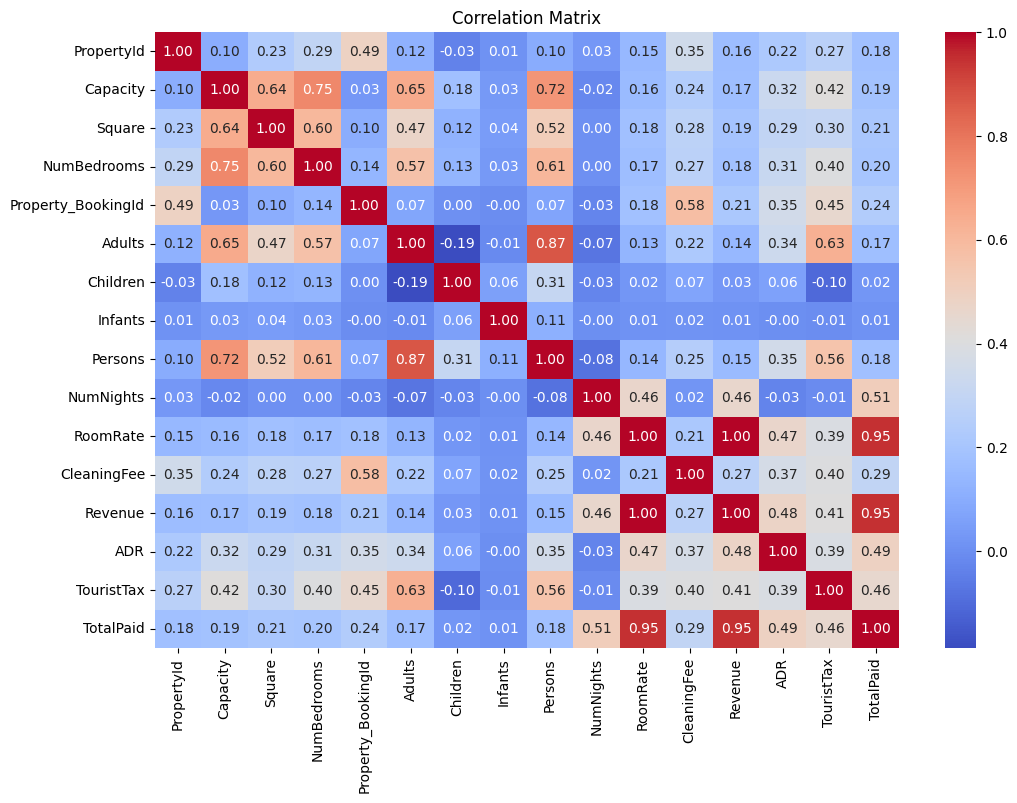

In [49]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see a really big correlation between the columns Revenue, RoomRate and TotalPaid.

Let's visualize those columns further.

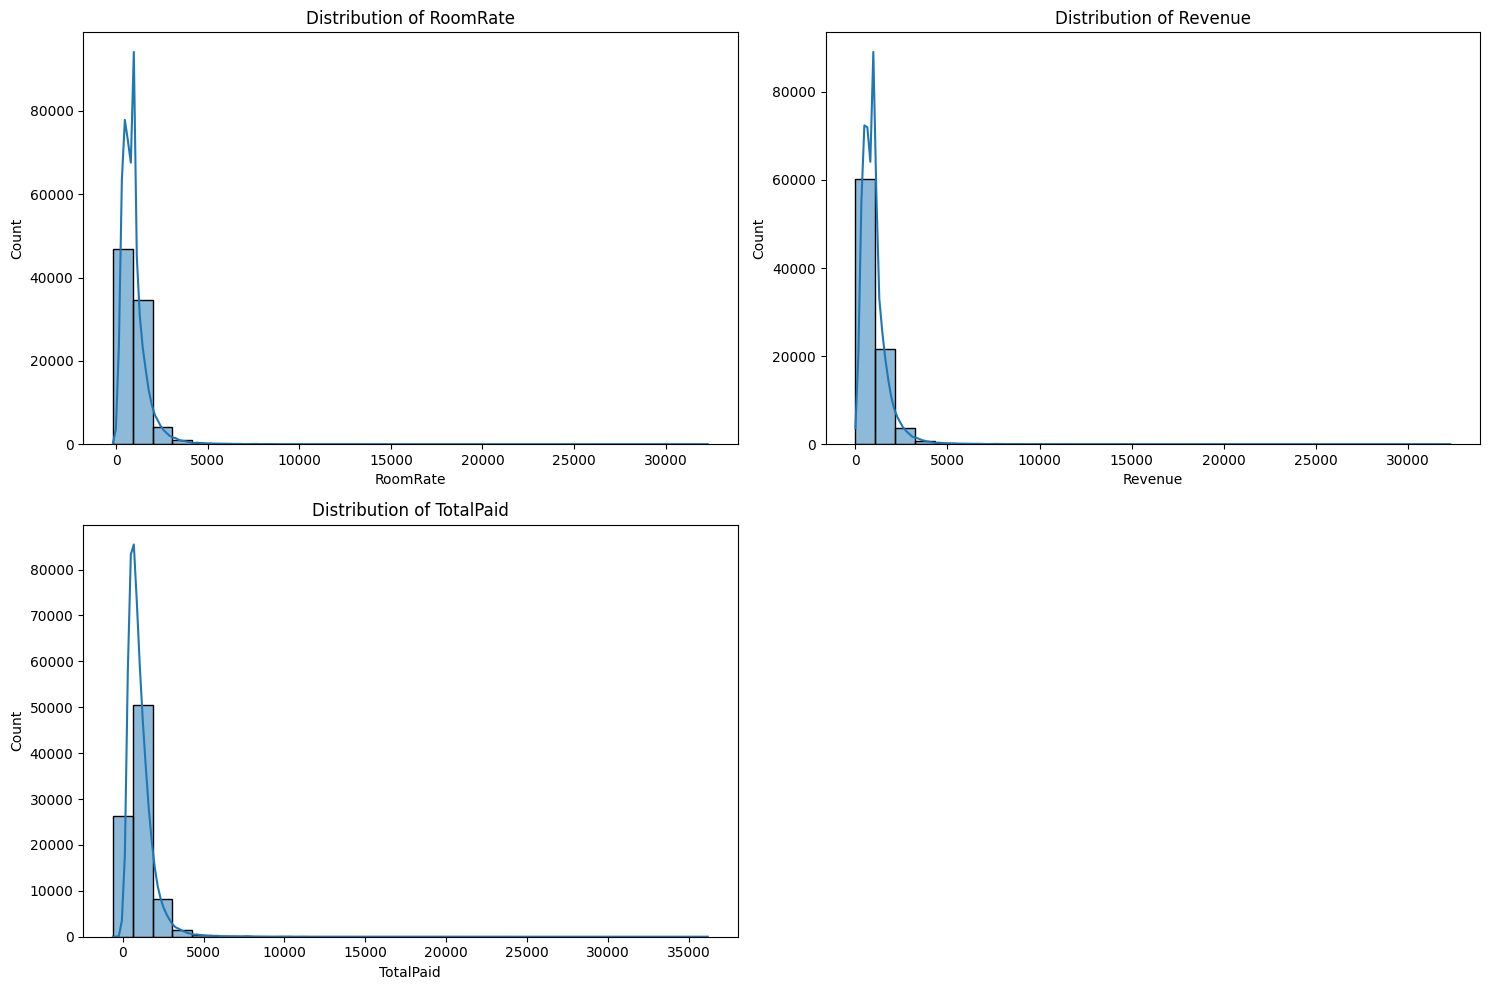

In [50]:
# Plotting distributions
plt.figure(figsize=(15, 10))
correlated_columns = ['RoomRate', 'Revenue', 'TotalPaid']
for i, column in enumerate(correlated_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Here we can see how each of this columns are distributed.

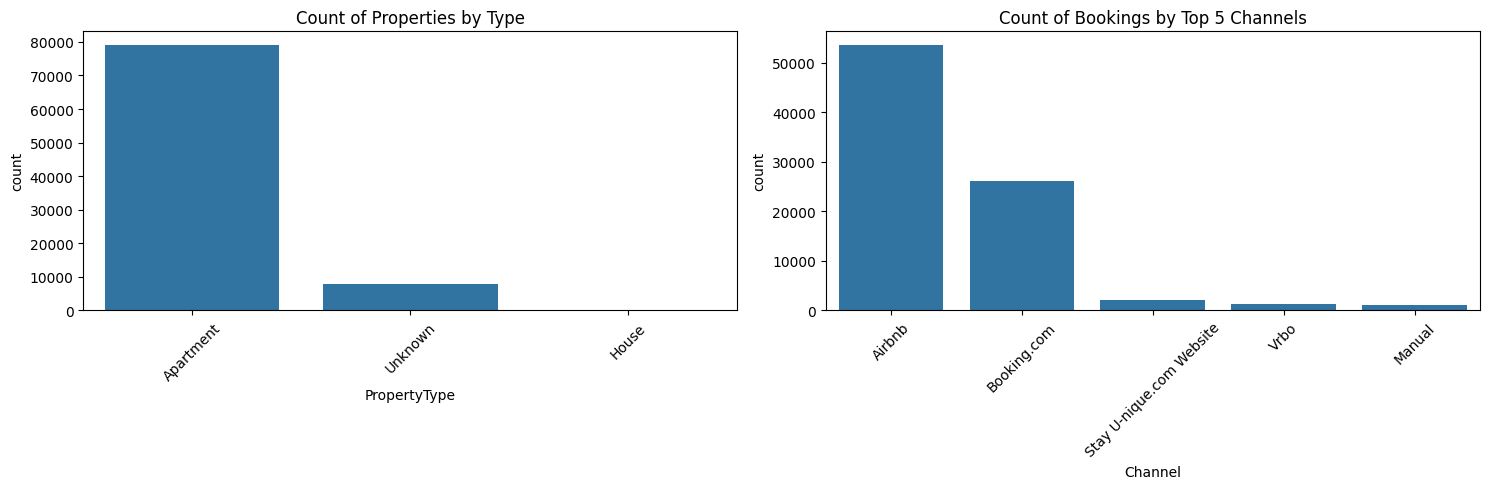

In [51]:
# Count plots for categorical variables
plt.figure(figsize=(15, 5))

# Property Type
plt.subplot(1, 2, 1)
sns.countplot(data=merged_df, x='PropertyType', order=merged_df['PropertyType'].value_counts().index)
plt.title('Count of Properties by Type')
plt.xticks(rotation=45)

# Booking Channel
top_channels = merged_df['Channel'].value_counts().nlargest(5).index
plt.subplot(1, 2, 2)
sns.countplot(data=merged_df, x='Channel', order=top_channels)
plt.title('Count of Bookings by Top 5 Channels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can see how most of the people rent Apartments on Barcelone throug Airbnb.

Let's now try to analyze some trends on the bookings.

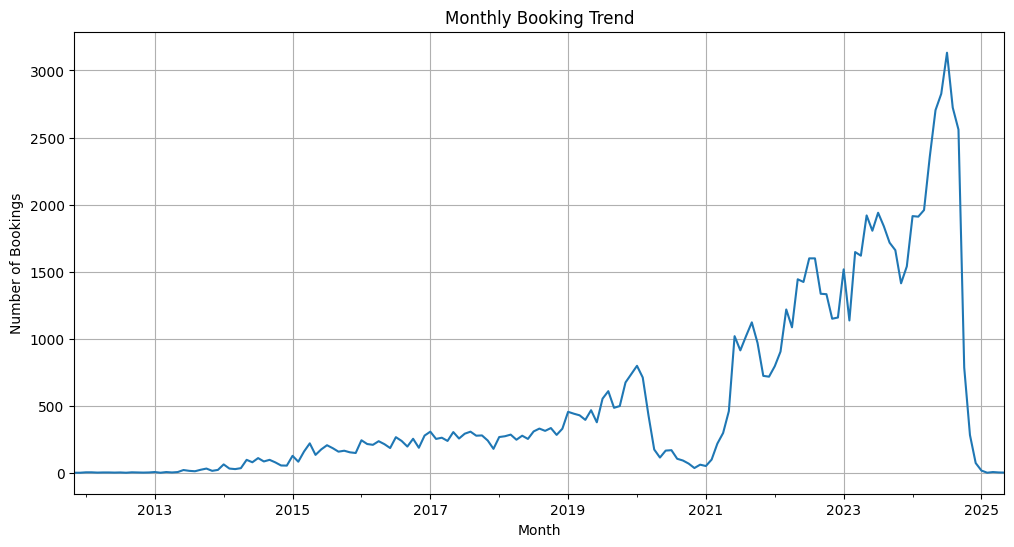

In [52]:
# Time Series Analysis: Number of bookings over time
merged_df['BookingCreatedDate'] = pd.to_datetime(merged_df['BookingCreatedDate'])
booking_trend = merged_df.groupby(merged_df['BookingCreatedDate'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
booking_trend.plot(kind='line')
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid()
plt.show()

We can see how the bookings increase over time with a big deacrease on the year 2020 and 2021 because of the pandemic but after that the bookings started to increase again.

And lastly let's try to analyze the outliers on the data.

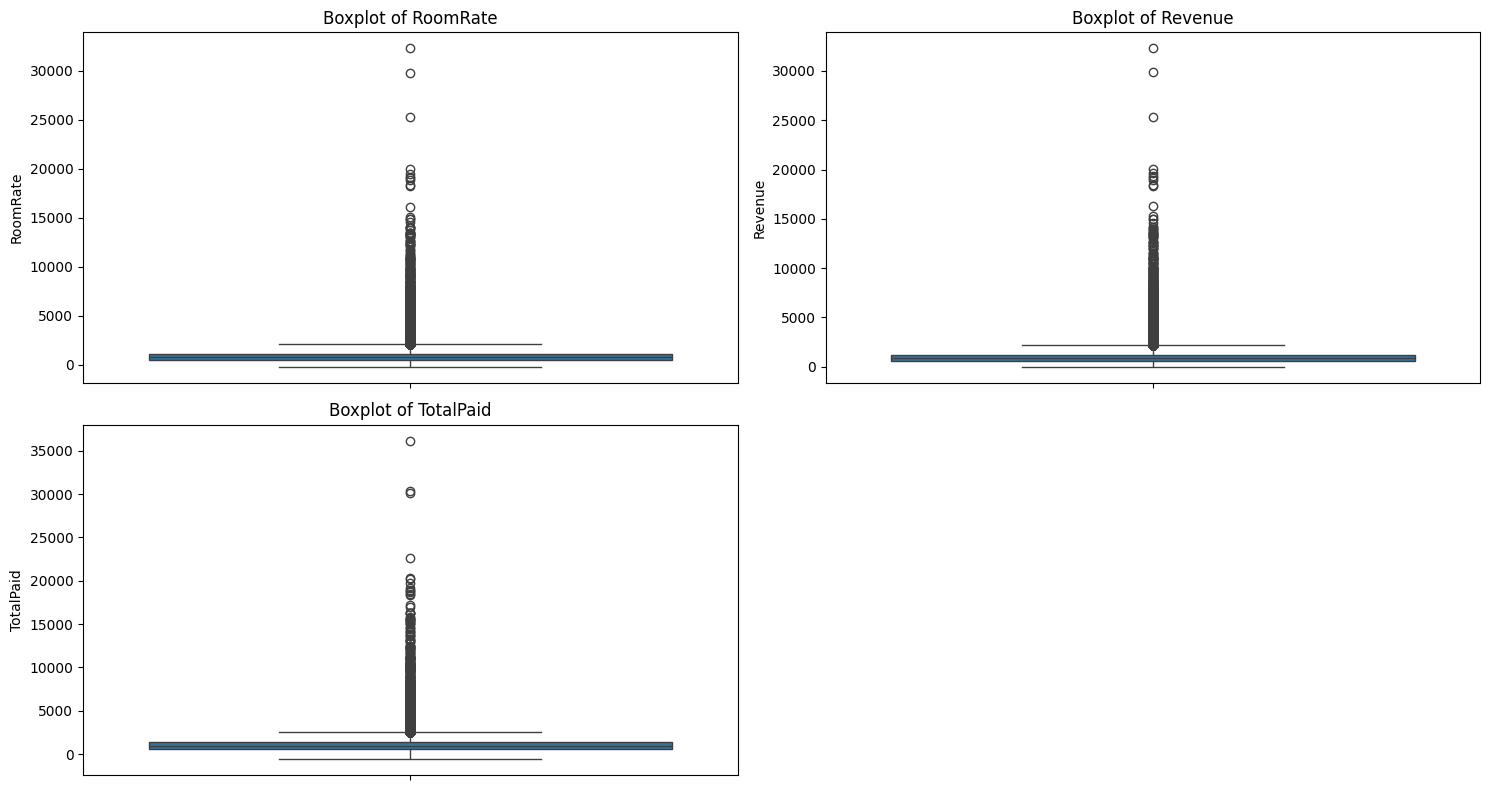

In [53]:
# Box plots for numerical columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(correlated_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=merged_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Summary of Findings

## Data Overview
The dataset contains information about property bookings, including details such as property type, booking channels, and various financial metrics. The data spans from 2011 to 2024, with a noticeable increase in bookings in 2024.

## Data Types and Descriptive Statistics
- The dataset includes both numerical and categorical variables.
- Descriptive statistics provided insights into the central tendency and dispersion of the numerical variables.

## Correlation Analysis
- A correlation matrix was generated to understand the relationships between numerical features.
- Significant correlations were observed between `Revenue`, `RoomRate`, and `TotalPaid`, indicating that these financial metrics are closely related.

## Distribution Analysis
- The distributions of `RoomRate`, `Revenue`, and `TotalPaid` were visualized using histograms.
- These distributions provided insights into the spread and central tendency of these financial metrics.

## Categorical Analysis
- Count plots were created for categorical variables such as `PropertyType` and `Channel`.
- The analysis revealed that most properties are apartments, and Airbnb is the most popular booking channel.

## Time Series Analysis
- A time series analysis of the number of bookings over time showed a significant increase in bookings over time.
- It also showed a significant decrease on the years 2020 and 2021. This might be due to the COVID pandemic.

## Outlier Analysis
- Box plots were used to identify outliers in the numerical columns.
- The analysis highlighted the presence of outliers in `RoomRate`, `Revenue`, and `TotalPaid`, which could be further investigated.

## Conclusion
The EDA provided valuable insights into the dataset, revealing key trends and relationships between variables. The significant increase in bookings in 2024 and the strong correlations between financial metrics are notable findings. These insights can guide further analysis and decision-making processes.